In [1]:
import skxray.roi as roi
import skxray.correlation as corr
import skxray.core as core

from lmfit import minimize, Parameters

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


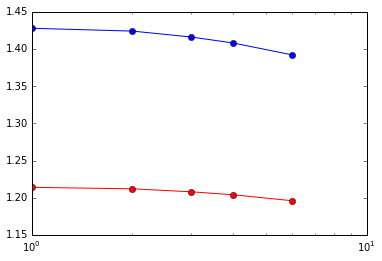

In [11]:
params = Parameters()
params.add('beta',  value=10, min=0.10, max=0.14)
params.add('relaxation_rate', value=6.7, min=6.7, max=8.9)
params.add('baseline', value=1, min=0.8, max=1.0)
    
num_levels, num_bufs = 2, 4
tot_channels, lags = core.multi_tau_lags(num_levels, num_bufs)
data = np.array([1.216, 1.214, 1.212, 1.208, 1.204, 1.196])

fit_result = corr.fit_auto_corr(params1, lags, data, eps_data=1)

plt.semilogx(lags, data, '-ro')
plt.semilogx(lags, fit_result, '-bo')
plt.show()


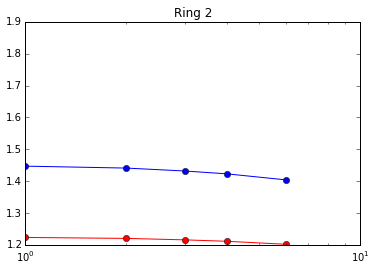

In [68]:
# create a set of Parameters for second ring
params2 = Parameters()
params2.add('beta',  value=0.15, min=0.148, max=0.2268)
params2.add('relaxation_rate', value=6.478, min=6.38, max=6.489)
params2.add('baseline', value=1, min=0.823, max=1)  

final_result2 = corr.fit_auto_corr(params2, lags, g2[:, 1], eps_data=1)

plt.semilogx(lags, g2[:,1], '-ro')
plt.semilogx(lags, final_result2, '-bo')
plt.title("Ring 2")
plt.show()